## Assignment Overview

The data used to complete the following analysis report was provided by Pymaceuticals Inc., a pharmaceutical company based out of San Diego specializing in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. 

I have been given access to their complete data from their recent animal study were 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Tumor development was observed and measured over 45 days. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. My task is to generate all of the tables and figures needed for the technical report of the study, as well as, produce a top-level summary of the study results.

## Observations and Insights

* An initial review of the Summary Statistics generated from the results of the study revealed that Pymaceuticals' drug of interest, Capomulin, and Ramicane performed better at reducing the tumor volume of the mice participating in the treatment regimens. In fact, Ramicane has a slightly lower tumor volume than Capomulin with a smaller standard error of the mean which indicates that Ramicane tumor volume mean is a more accurate estimate of the population mean.

* The gender participation comparison depicted in the pie chart reveals that slightly more male mice were treated in this study than female mice. The difference is not enough to make the sex characteristic a significant variable in this study.

* A chart was generated for four drug regimens of interest (Capomulin, Ramicane, Ceftamin, and Infubinol). The results of this comparison indicate that Ramicane and Capomulin produced lower tumor volumes than Ceftamin and Infubinol. This comparison also revealed that fewer mice were treated with Ceftamin and Infubinol. The lower number of treated mice may have an impact on the overall accuracy of the results. More mice should be treated with Ceftamin and Infubinol to determine if the lower treated count is a significant factor of the final results.

* An isolated review of a Capomulin treated mouse over 45 days was generated. The tumor volume for Mouse ID t565 decreased over the 45 days of receiving the drug regimen. The results support the assumption that there is a case to made that Capomulin reduces tumor volume in mice.

* There was also a positive correlation between the treated mice's averege weight and their final tumor volume. Here the assumption can be made that tumor volume can be determined by the mouse's average weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_table = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
project_mice = mouse_study_table['Mouse ID'].unique()
total_mice = len(project_mice)
print(f'There are {total_mice} mice listed in the initial dataset.')

There are 249 mice listed in the initial dataset.


In [3]:
# How many duplicates are in the DataFrame. 
duplicates = mouse_study_table.duplicated().sum()
print(f'Total number of duplicates = {duplicates}')

Total number of duplicates = 1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
print(f'The following table includes the Mouse ID with the duplicate file.' )
mouse_study_table.loc[mouse_study_table.duplicated(keep=False),:]


The following table includes the Mouse ID with the duplicate file.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_table = mouse_study_table[mouse_study_table["Mouse ID"] !="g989"]
# clean_table = mouse_study_table.drop_duplicates(subset = 'Mouse ID', keep = False, inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
new_file = clean_table['Mouse ID'].unique()
mice_data = len(new_file)
print(f'The clean DataFrame has {mice_data} mice in the new dataset.')

The clean DataFrame has 248 mice in the new dataset.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_table.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

drug_table_df = pd.DataFrame({
    'Tumor Volume Mean (mm3)': clean_table.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],
    'Tumor Volume Median (mm3)': clean_table.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],
    'Tumor Volume Variance (mm3)': clean_table.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],
    'Tumor Volume Standard Deviation (mm3)': clean_table.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],
    'Tumor Volume Standard Error (mm3)': clean_table.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
    
})

drug_table_df

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume Standard Error (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_table = clean_table.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
single_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
clean_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

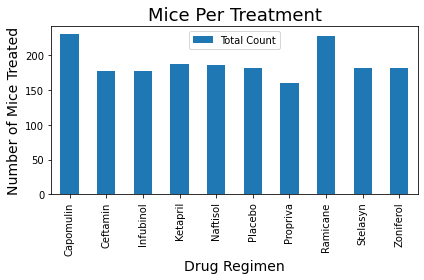

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_name = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]

drug_total_df = pd.DataFrame({'Drug Regimen': drug_name, 'Total Count': drug_count})

panda_bar_plot = drug_total_df.plot.bar(x='Drug Regimen', y = 'Total Count')
plt.title("Mice Per Treatment",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=14)
plt.ylabel("Number of Mice Treated",fontsize=14)


plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


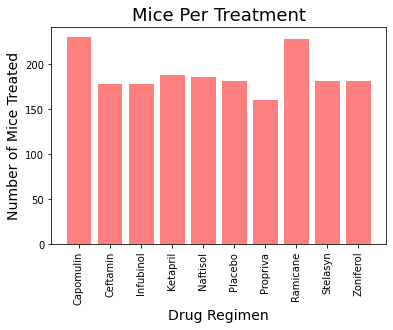

<Figure size 720x360 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(clean_table.groupby('Drug Regimen')['Tumor Volume (mm3)']))
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center")

plt.title("Mice Per Treatment",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=14)
plt.ylabel("Number of Mice Treated",fontsize=14)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation="vertical")
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.show()

(-1.1751841875488713,
 1.1303558271612584,
 -1.1928576872782923,
 1.126752816440996)

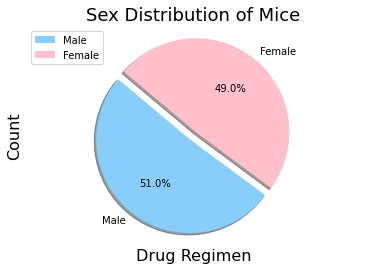

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# clean_table_df.groupby('Sex').count()['Mouse ID']
# mouse_gender = clean_table.groupby(['Mouse ID','Sex'])
mouse_gender = clean_table['Sex'].value_counts()
mouse_gender_df = pd.DataFrame(mouse_gender)

# Define chart parameters
colors = ["lightskyblue", "pink"]
explode = (0.1, 0)
gender_pie_chart = mouse_gender_df.plot(kind="pie", y='Sex', explode=explode, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Edit Labels
plt.title("Sex Distribution of Mice",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)

#Create axes
plt.axis("equal")


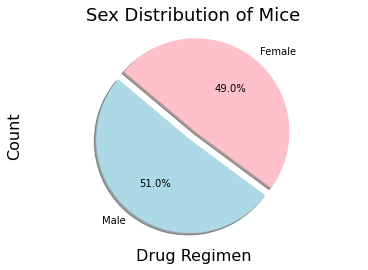

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_table.columns
gender_df = clean_table[['Sex']]
gender_df.value_counts()


sex = ["Male", "Female"]
sex_counts = [958, 922]
colors = ["lightblue","pink"]
explode = (0.1,0)

# Create a pie chart with pyplot
plt.pie(sex_counts, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Edit Labels
plt.title("Sex Distribution of Mice",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)

# Create axes
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

Capomulin_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Capomulin",:]
Ramicane_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Ramicane",:]
Infubinol_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Infubinol",:]
Ceftamin_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Ceftamin",:]

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# drug_list_df = pd.DataFrame(drug_regimens_list)
# # pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
# drug_merge_file = pd.merge(drug_list_df,mouse_study_table, on=('Mouse ID', 'Drug Regimen'), how='left')
# drug_merge_file

# Capomulin
Capomulin_max = Capomulin_final.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max)
Capomulin_merge = pd.merge(Capomulin_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Ramicane
Ramicane_max = Ramicane_final.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max)
Ramicane_merge = pd.merge(Ramicane_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Infubinol
Infubinol_max = Infubinol_final.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
Infubinol_merge = pd.merge(Infubinol_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Ceftamin
Ceftamin_max = Ceftamin_final.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max)
Ceftamin_merge = pd.merge(Ceftamin_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


In [15]:
# Calculate the final tumor volume of each mouse across the Capomulin regimen
# Capomulin_merge

In [16]:
# Calculate the final tumor volume of each mouse across the Ramincane regimen
# Ramicane_merge

In [17]:
# Calculate the final tumor volume of each mouse across the Infubinol regimen
# Infubinol_merge

In [18]:
# # Calculate the final tumor volume of each mouse across the Ceftamin regimen
# Ceftamin_merge

In [19]:
# Create DataFrame with all of the final tumor volumes of each mouse
drug_regimens_list = [Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge] 
drug_reg_df= pd.concat(drug_regimens_list, axis = 0, ignore_index=False)
drug_reg_final = drug_reg_df.drop(columns=['Sex','Age_months', 'Weight (g)', 'Metastatic Sites']) 


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    x_volume = drug_reg_final.loc[drug_reg_final['Drug Regimen']==x]['Tumor Volume (mm3)']
    tumor_vol_data.append(x_volume)


    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = x_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_treatment = x_volume.loc[(x_volume < lower_bound) | (x_volume > upper_bound)]

    print(' ')
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(' ')
    print(f"The median of {x} is: {round(quartiles[0.5],2)} ")
    print(f"{x} values below {lower_bound} could be outliers.")
    print(f"{x} values above {upper_bound} could be outliers.")
    print(' ')
    
    if len(outliers_treatment) > 0:
        print(f'{x} has outliers at {outliers_treatment}.')

 
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
 
The median of Capomulin is: 38.13 
Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.
 
 
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
 
The median of Ramicane is: 36.56 
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.
 
 
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
 
The median of Infubinol is: 60.17 
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.
 
Infubinol has outliers at 5    36.321346
Name: Tumor Volume (mm3), dt

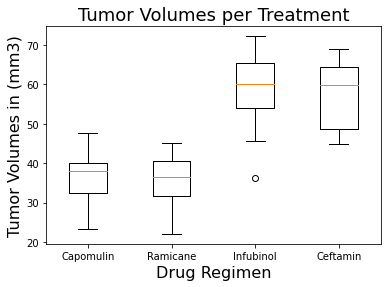

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatment_list)
plt.title('Tumor Volumes per Treatment',fontsize=18)
plt.xlabel('Drug Regimen',fontsize=16)
plt.ylabel('Tumor Volumes in (mm3)',fontsize=16)
plt.show()


## Line and Scatter Plots

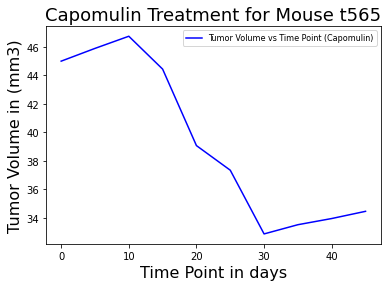

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_final.loc[Capomulin_final["Mouse ID"] == "t565",:]

# Collect the the timepoints and tumor volumes
x = line_plot_df['Timepoint']
y = line_plot_df['Tumor Volume (mm3)']
line, = plt.plot(x, y, color="blue", label="Tumor Volume vs Time Point (Capomulin)")
plt.title('Capomulin Treatment for Mouse t565',fontsize=18)
plt.xlabel('Time Point in days',fontsize=16)
plt.ylabel('Tumor Volume in (mm3)',fontsize=16)
plt.legend(handles=[line],loc="best",fontsize=8)
plt.show()
plt.tight_layout



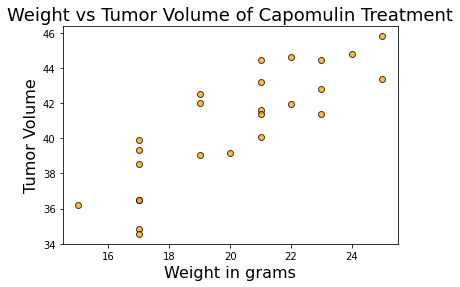

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_file = Capomulin_final.drop(columns=['Sex','Age_months', 'Timepoint','Metastatic Sites'])
Capo_mouse = Capo_file.groupby('Mouse ID')

y_axis = Capo_mouse['Tumor Volume (mm3)'].mean()
x_axis = Capo_mouse['Weight (g)'].mean()

# plt.scatter(weight_avg_cap,tumor_avg_cap)
# # avg_cap = drug_reg_df.groupby('MouseID').mean()['Capomulin']
# # avg_cap
# scatter_mouse_df = pd.DataFrame({
#     'Weight': [weight_avg_cap],
#     'Tumor Volume': [tumor_avg_cap]})
# scatter_mouse_df

# x_axis = scatter_mouse_df['Weight']
# y_axis = scatter_mouse_df['Tumor Volume']

plt.scatter(x_axis,y_axis, marker='o', facecolors="orange", edgecolors='black', alpha=.75 )
plt.title('Weight vs Tumor Volume of Capomulin Treatment',fontsize=18)
plt.xlabel('Weight in grams',fontsize=16)
plt.ylabel('Tumor Volume',fontsize=16)
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84


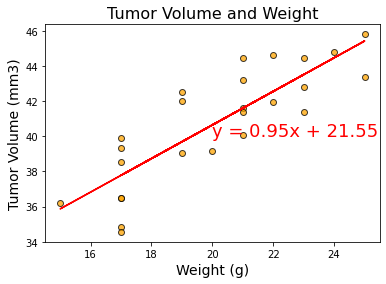

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#set x and y
# x_values = mouse_df["Weight (g)"]
# y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(cap_slope, cap_intercept, cap_rvalue, cap_pvalue, cap_stderr) = st.linregress(x_axis, y_axis)
cap_fit = x_axis * cap_slope + cap_intercept
plt.scatter(x_axis,y_axis, marker='o', facecolors="orange", edgecolors='black', alpha=.75 )

# Plot scatter plot with regression line equation
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_intercept,2))
plt.annotate(line_eq,(20,40),fontsize=18,color="red")
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# #plot scatter
# plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
#             s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight",fontsize=16)
plt.xlabel("Weight (g)",fontsize=14)
plt.ylabel("Tumor Volume (mm3)",fontsize=14)

#plot line
plt.plot(x_axis,cap_fit,"r-")
# plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")